<a href="https://colab.research.google.com/github/mateocapon/simulacion_tp1/blob/main/Ejercicio%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 5

In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from scipy.stats import chi2



modulo = 2**32
multiplicador = 1013904223
incremento = 1664525
semilla = int((101503+103856+104258+102995)/4)

def generarRandomNormalizada(n):
    x = semilla
    result = []
    for i in range(n):
        result.append(x/modulo)
        x = (x * multiplicador + incremento) % modulo
    return result

N = 100000

In [2]:
x = generarRandomNormalizada(N)

pA = 0.1
pB = 0.5
pC = 0.3
pD = 0.1

A = []
B = []
C = []
D = []

for i in x:
    if i <= pA:
        A.append(i)
    elif i <= pA+pB:
        B.append(i)
    elif i <= pA+pB+pC:
        C.append(i)
    else:
        D.append(i)

In [3]:
Y = [len(A)/N,len(B)/N,len(C)/N,len(D)/N]

X = ["A","B","C","D"]

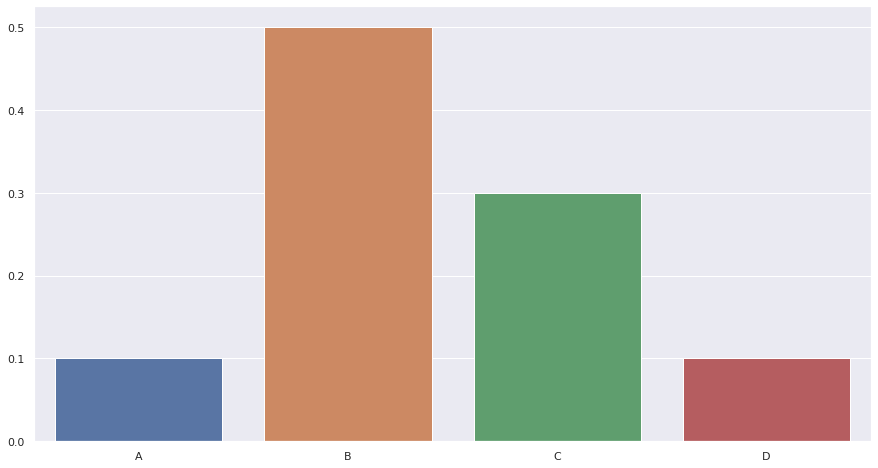

In [4]:
plt.figure(figsize=(15, 8))

sns.set_theme()

sns.barplot( x=X , y=Y )

In [5]:
import pandas as pd


df = [A,B,C,D]

df = pd.DataFrame(df).T

df.columns = ["A","B","C","D"]

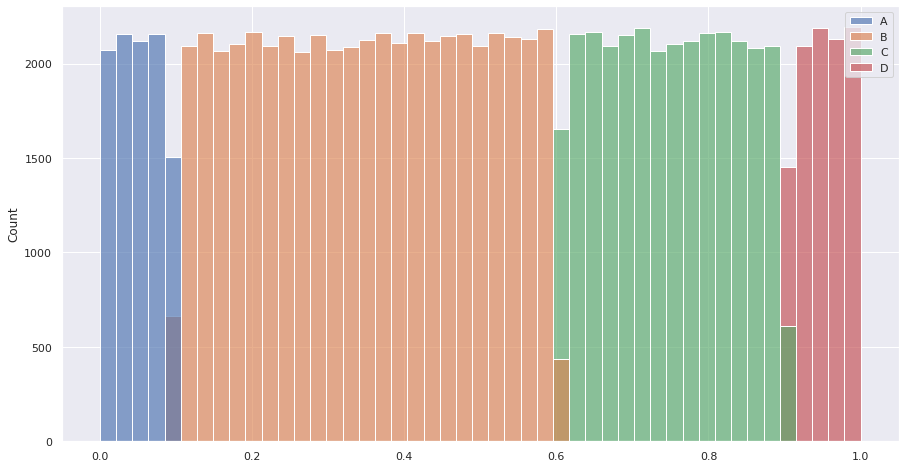

In [6]:
plt.figure(figsize=(15, 8))

sns.histplot( data=df, alpha= 0.65, stat="count")

## Ejercicio 5.d

Realizaremos un test de frecuencias para comprobar que los números generados se distribuyan siguiendo la función de probabilidad esperada.


Calculamos las frecuencias esperadas realizando:


$$ f_{i}e = N * p_{i}   $$

$$ i \to A,B,C,D $$
 

donde $f_{i}$ es nuestra frecuencia esperada.

En cuanto a nuestras frecuencias obtenidas, lo que haremos es calcular el largo de cada lista generada por el algoritmo de los puntos anteriores.

In [7]:
fAe = N * pA
fBe = N * pB
fCe = N * pC
fDe = N * pD

frecuencias_obtenidas = [ len(A), len(B), len(C), len(D) ]
frecuencias_esperadas = [ fAe, fBe, fCe, fDe ]

print(frecuencias_esperadas)
print(frecuencias_obtenidas)

[10000.0, 50000.0, 30000.0, 10000.0]
[10019, 49993, 29932, 10056]


Vemos el limite superior de nuestro test, donde nuestro estimador es:


$$ D2 = \sum_{i=0}^{3}\frac{(f_{i}^{Obtenida}-f_{i}^{Esperada})^{2}} {f_{i}^{Esperada}} $$

In [8]:
D2 = sum( ( (frecuencias_obtenidas[i] - frecuencias_esperadas[i])**2 / frecuencias_esperadas[i]) for i in range(len(frecuencias_esperadas) ) )

grados = len(df) - 1
alpha = 0.99

limiteSuperior = chi2.ppf( alpha, df=grados )

In [9]:
if D2 <= limiteSuperior:
    print("El test acepta la hipótesis nula.")
else:
    print("El test rechaza la hipótesis nula")

El test acepta la hipótesis nula.
